In [ ]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 90.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 1179s 14s/step - accuracy: 0.4587 - loss: 1.1728 - val_accuracy: 0.3333 - val_loss: 4.2047
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 573ms/step - accuracy: 0.6419 - loss: 0.9073 - val_accuracy: 0.3333 - val_loss: 1.2853
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 576ms/step - accuracy: 0.5974 - loss: 0.9306 - val_accuracy: 0.3383 - val_loss: 1.8051
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 577ms/step - accuracy: 0.6840 - loss: 0.7474 - val_accuracy: 0.3333 - val_loss: 2.5102
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 575ms/step - accuracy: 0.7406 - loss: 0.6430 - val_accuracy: 0.5317 - val_loss: 0.9608
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 582ms/step - accuracy: 0.8126 - loss: 0.5295 - val_accuracy: 0.3717 - val_loss: 1.2717
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 585ms/step - accuracy: 0.8262 - loss: 0.4360 - val_accuracy: 0.3333 - val_loss: 49.3631
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 592ms/step - accuracy: 0.8712 - loss: 0.3505 - val_accuracy: 0.33

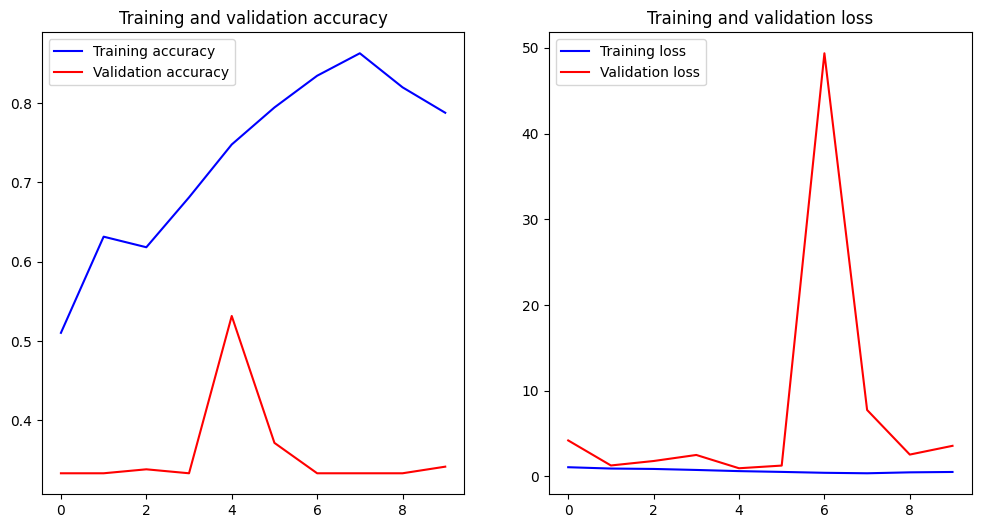

In [ ]:
# 구글넷
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/00_01_colab/dataset/Train"

# ImageDataGenerator 객체 생성 - 이미지 데이터의 전처리 및 증강을 수행
datagen = ImageDataGenerator(
    rescale=1./255,  # 이미지 정규화
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input  # InceptionV3에 맞게 전처리
)

# 훈련 데이터 생성기 설정
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),  # 이미지 크기를 100x100으로 리사이즈
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 검증 데이터 생성기 설정
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),  # 이미지 크기를 100x100으로 리사이즈
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# GoogleNet(InceptionV3) 모델 로드 (사전 훈련된 가중치 사용)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# 모델 구조 정의
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# 모델 평가
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")

# 모델 저장
model.save('/content/drive/MyDrive/00_01_colab/model/inceptionv3_model.keras')

# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

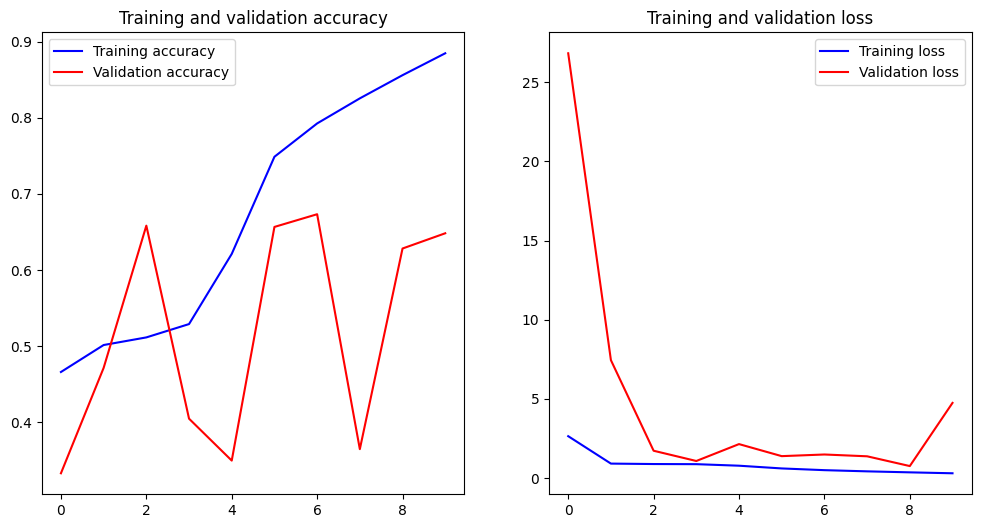

In [ ]:
# 구글넷
# 모델 저장
model.save('/content/drive/MyDrive/00_01_colab/model/inceptionv3_model.keras')

# 학습 결과 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 110s 699ms/step - accuracy: 0.5295 - loss: 4.8095 - val_accuracy: 0.3333 - val_loss: 2005.0737
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 50s 620ms/step - accuracy: 0.7908 - loss: 0.5802 - val_accuracy: 0.3333 - val_loss: 5.8358
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 51s 623ms/step - accuracy: 0.8557 - loss: 0.3987 - val_accuracy: 0.3333 - val_loss: 3.0864
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 588ms/step - accuracy: 0.9098 - loss: 0.2346 - val_accuracy: 0.3333 - val_loss: 4.5110
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 595ms/step - accuracy: 0.9277 - loss: 0.2107 - val_accuracy: 0.3333 - val_loss: 1.5456
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 587ms/step - accuracy: 0.9311 - loss: 0.1934 - val_accuracy: 0.3333 - val_loss: 1.6442
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 597ms/step - accuracy: 0.9513 - loss: 0.1518 -

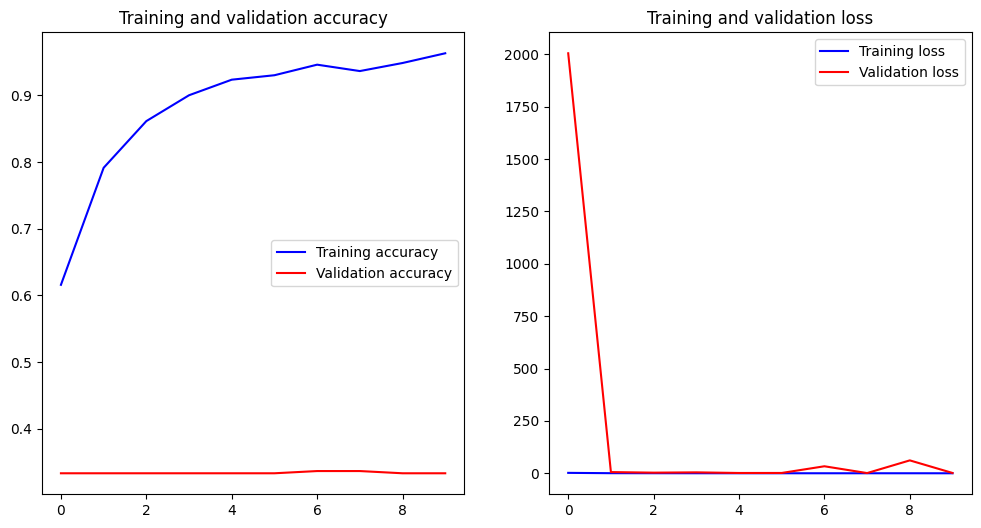

In [ ]:
# Resnet50
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/00_01_colab/dataset/Train"

# ImageDataGenerator 객체 생성 - 이미지 데이터의 전처리 및 증강을 수행
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# 훈련 데이터 생성기 설정
train_generator = datagen.flow_from_directory(
    data_dir,  # 이미지가 저장된 디렉토리 경로
    target_size=(100, 100),
    batch_size=32,  # 배치 크기를 32로 설정
    class_mode='categorical',  # 다중 클래스 분류를 위한 카테고리 모드 설정
    subset='training'  # 훈련 데이터로 사용할 부분 지정
)

# 검증 데이터 생성기 설정
validation_generator = datagen.flow_from_directory(
    data_dir,  # 이미지가 저장된 디렉토리 경로
    target_size=(100, 100),
    batch_size=32,  # 배치 크기를 32로 설정
    class_mode='categorical',  # 다중 클래스 분류를 위한 카테고리 모드 설정
    subset='validation'  # 검증 데이터로 사용할 부분 지정
)

# ResNet50 모델 로드 (사전 훈련된 가중치 사용)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# 모델 구조 정의
model = Sequential([
    base_model,  # ResNet50 모델을 포함
    Flatten(),  # 2D에서 1D로 평탄화
    Dense(512, activation='relu'),  # 전결합층
    Dense(train_generator.num_classes, activation='softmax')  # 최종 분류 레이어
])

# 모델 컴파일
model.compile(optimizer='adam',  # Adam 옵티마이저 사용
              loss='categorical_crossentropy',  # 다중 클래스 분류를 위한 크로스엔트로피 손실 함수 사용
              metrics=['accuracy'])  # 모델의 정확도를 평가 지표로 사용

# 모델 훈련
history = model.fit(
    train_generator,
    epochs=10 ,
    validation_data=validation_generator
)

# 모델 평가
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.4f}")  # 정확도를 소수점 4자리까지 출력
print(f"Validation Loss: {loss:.4f}")  # 손실 값을 소수점 4자리까지 출력

# 모델 저장
model.save('/content/drive/MyDrive/00_01_colab/model/resnet50_model.keras')

# 학습 결과 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 53s 615ms/step - accuracy: 0.4590 - loss: 1.0288 - val_accuracy: 0.4433 - val_loss: 1.1054
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 571ms/step - accuracy: 0.6021 - loss: 0.8576 - val_accuracy: 0.6567 - val_loss: 0.8830
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 575ms/step - accuracy: 0.6884 - loss: 0.7281 - val_accuracy: 0.6583 - val_loss: 0.8586
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 577ms/step - accuracy: 0.7465 - loss: 0.6128 - val_accuracy: 0.6467 - val_loss: 0.9376
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 587ms/step - accuracy: 0.8080 - loss: 0.4896 - val_accuracy: 0.6617 - val_loss: 1.1446
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 581ms/step - accuracy: 0.8763 - loss: 0.3381 - val_accuracy: 0.6567 - val_loss: 0.9336
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 584ms/step - accuracy: 0.9282 - loss: 0.2026 - val_accuracy: 0.6100 - val_loss: 1.6575
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 573ms/step - accuracy: 0.9561 - loss: 0.1246 - val_accu

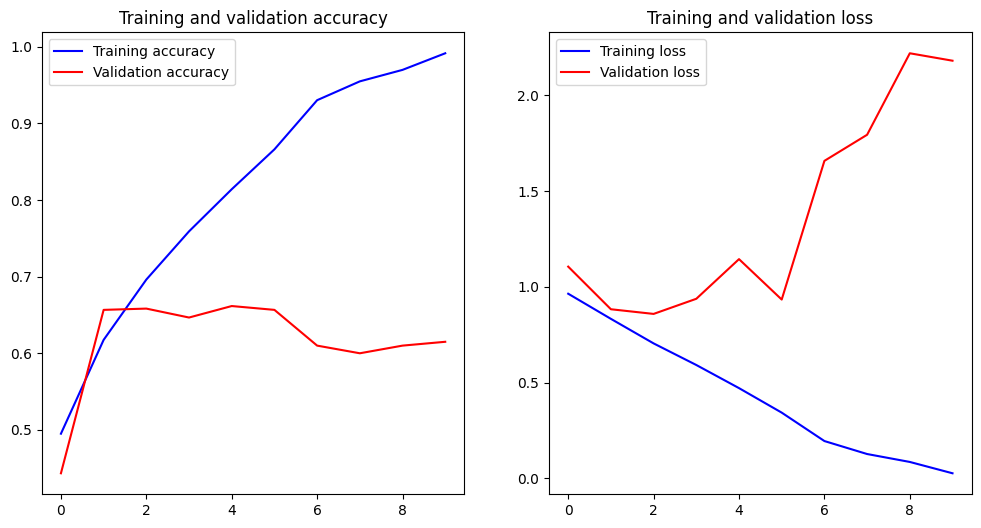

In [ ]:
# CNN
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/00_01_colab/dataset/Train"

# ImageDataGenerator 객체 생성
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# 훈련 데이터 생성기 설정
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 검증 데이터 생성기 설정
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # num_classes는 데이터에서 자동으로 결정됨
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 훈련
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# 모델 평가
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")

# 모델 저장
model.save('/content/drive/MyDrive/00_01_colab/model/cnn_basic_model.keras')

# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 64s 705ms/step - accuracy: 0.3478 - loss: 43.5273 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 679ms/step - accuracy: 0.3480 - loss: 1.0981 - val_accuracy: 0.3333 - val_loss: 1.0989
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 684ms/step - accuracy: 0.3477 - loss: 1.0958 - val_accuracy: 0.3333 - val_loss: 1.0992
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 679ms/step - accuracy: 0.3355 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 680ms/step - accuracy: 0.3414 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 688ms/step - accuracy: 0.3479 - loss: 1.0984 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 687ms/step - accuracy: 0.3478 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 8/10
75

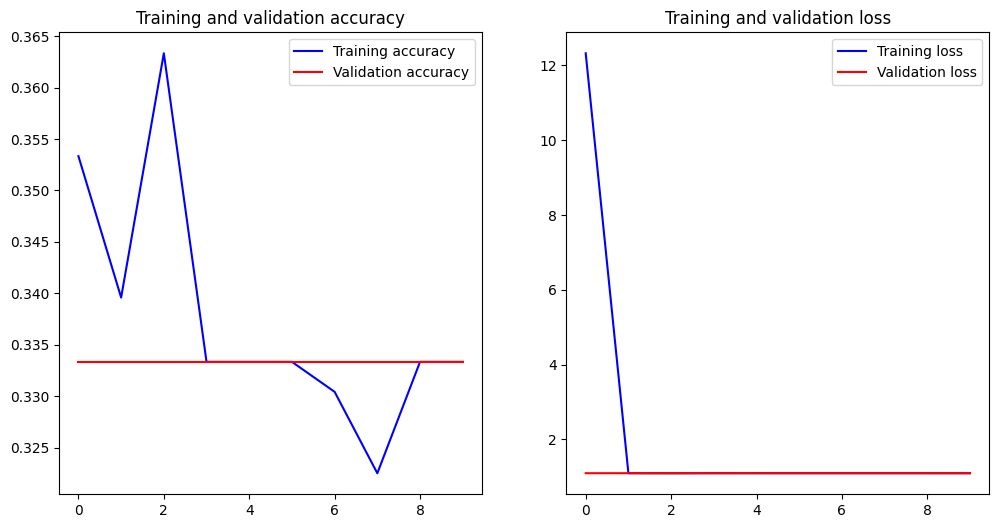

In [ ]:
# VGG19
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/00_01_colab/dataset/Train"

# ImageDataGenerator 객체 생성 - 이미지 데이터의 전처리 및 증강을 수행
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# 훈련 데이터 생성기 설정
train_generator = datagen.flow_from_directory(
    data_dir,  # 이미지가 저장된 디렉토리 경로
    target_size=(100, 100),  # 모든 이미지를 100x100 크기로 리사이즈
    batch_size=32,  # 배치 크기를 32로 설정
    class_mode='categorical',  # 다중 클래스 분류를 위한 카테고리 모드 설정
    subset='training'  # 훈련 데이터로 사용할 부분 지정
)

# 검증 데이터 생성기 설정
validation_generator = datagen.flow_from_directory(
    data_dir,  # 이미지가 저장된 디렉토리 경로
    target_size=(100, 100),  # 모든 이미지를 100x100 크기로 리사이즈
    batch_size=32,  # 배치 크기를 32로 설정
    class_mode='categorical',  # 다중 클래스 분류를 위한 카테고리 모드 설정
    subset='validation'  # 검증 데이터로 사용할 부분 지정
)

# VGG19 모델 로드 (사전 훈련된 가중치 없이 사용)
base_model = VGG19(weights=None, include_top=False, input_shape=(100, 100, 3))

# 모델 구조 정의
model = Sequential([
    base_model,  # VGG19 모델을 포함
    Flatten(),  # 2D에서 1D로 평탄화
    Dense(512, activation='relu'),  # 전결합층
    Dense(train_generator.num_classes, activation='softmax')  # 최종 분류 레이어
])

# 모델 컴파일
model.compile(optimizer='adam',  # Adam 옵티마이저 사용
              loss='categorical_crossentropy',  # 다중 클래스 분류를 위한 크로스엔트로피 손실 함수 사용
              metrics=['accuracy'])  # 모델의 정확도를 평가 지표로 사용

# 모델 훈련
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# 모델 평가
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.4f}")  # 정확도를 소수점 4자리까지 출력
print(f"Validation Loss: {loss:.4f}")  # 손실 값을 소수점 4자리까지 출력

# 모델 저장
model.save('/content/drive/MyDrive/00_01_colab/model/vgg19_model.keras')

# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


<ipython-input-5-b0f87640e27c>:35: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 71s 618ms/step - accuracy: 0.5469 - loss: 2.6122 - val_accuracy: 0.5017 - val_loss: 1.0727
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 566ms/step - accuracy: 0.8229 - loss: 0.4380 - val_accuracy: 0.5633 - val_loss: 1.0871
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 569ms/step - accuracy: 0.8927 - loss: 0.2864 - val_accuracy: 0.4667 - val_loss: 2.0747
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 565ms/step - accuracy: 0.9323 - loss: 0.1836 - val_accuracy: 0.6967 - val_loss: 1.2170
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 574ms/step - accuracy: 0.9500 - loss: 0.1492 - val_accuracy: 0.5933 - val_loss: 1.8309
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 570ms/step - accuracy: 0.9499 - loss: 0.1435 - val_accuracy: 0.5667 - val_loss: 2.4819
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 572ms/step - accuracy: 0.9397 - loss: 0.1593 - val_accuracy: 0.6167 - val_loss: 1.6074
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 572m

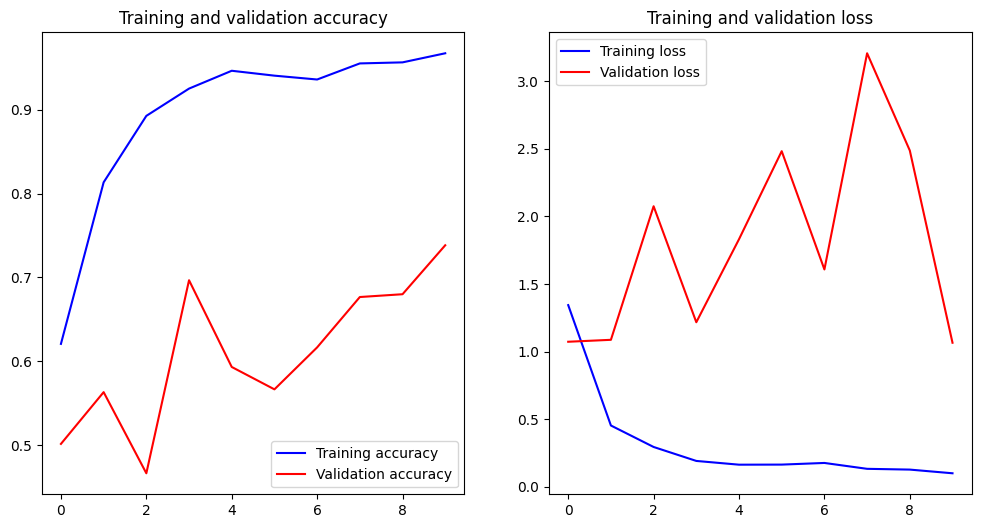

In [ ]:
# MobileNet
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/00_01_colab/dataset/Train"

# ImageDataGenerator 객체 생성
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# 훈련 데이터 생성기 설정
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),  # 이미지 크기를 100x100으로 리사이즈
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 검증 데이터 생성기 설정
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),  # 이미지 크기를 100x100으로 리사이즈
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# MobileNet 모델 로드 (사전 훈련된 가중치 사용)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# 모델 구조 정의
model = Sequential([
    base_model,  # MobileNet 모델을 포함
    Flatten(),  # 2D에서 1D로 평탄화
    Dense(512, activation='relu'),  # 전결합층
    Dense(train_generator.num_classes, activation='softmax')  # 최종 분류 레이어
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 훈련
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# 모델 평가
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")

# 모델 저장
model.save('/content/drive/MyDrive/00_01_colab/model/mobilenet_model.keras')

# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
